# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
                                    'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
                                    'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'])
            


# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,idm_r_MIN,idm_r_MAX,idm_r_MEAN,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.018896,0.384033,0.057680,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,8.189,9.622,2005,818,0.59,2.92,2.47,0.020510,0.262630,0.056071,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,8.380,9.589,2001,818,0.78,2.88,2.44,0.021948,0.146006,0.054125,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,8.137,9.449,2040,833,0.52,2.72,2.55,0.019093,0.366594,0.059043,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,7.696,9.401,1758,717,0.22,2.83,2.14,0.016348,0.295941,0.056370,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   idm_r_MIN      103 non-null    float64
 8   idm_r_MAX      103 non-null    float64
 9   idm_r_MEAN     103 non-null    float64
 10  idm_r_STD      103 non-null    float64
 11  idm_r_Q25      103 non-null    float64
 12  idm_r_Q50      103 non-null    float64
 13  idm_r_Q75      103 non-null    float64
 14  idm_g_MIN      103 non-null    float64
 15  idm_g_MAX      103 non-null    float64
 16  idm_g_MEAN     103 non-null    float64
 17  idm_g_STD      103 non-null    float64
 18  idm_g_Q25 

In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_17162/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [7]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,idm_r_MIN,idm_r_MAX,idm_r_MEAN,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,0.018784,0.361270,0.062383,...,0.043780,0.053322,0.068210,0.018715,0.369862,0.063183,0.031414,0.045112,0.054775,0.070020
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,0.004371,0.159418,0.013583,...,0.009554,0.011977,0.016121,0.004613,0.167070,0.013391,0.014380,0.009520,0.011976,0.016240
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,0.011770,0.116429,0.045291,...,0.032426,0.038965,0.048217,0.010157,0.119180,0.044884,0.011541,0.032628,0.038965,0.048217
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.016082,0.229642,0.053289,...,0.038160,0.045851,0.057399,0.015803,0.235651,0.054792,0.019469,0.039603,0.047617,0.058939
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.017919,0.326403,0.057774,...,0.041431,0.050218,0.062863,0.017749,0.329936,0.059749,0.029068,0.042930,0.051569,0.065442
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,0.020262,0.453982,0.066262,...,0.044375,0.055068,0.074153,0.020328,0.487015,0.068365,0.037530,0.046268,0.056588,0.075429
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,0.036265,0.748390,0.109070,...,0.084755,0.100882,0.123452,0.041025,0.770000,0.107732,0.075240,0.087202,0.104570,0.124853


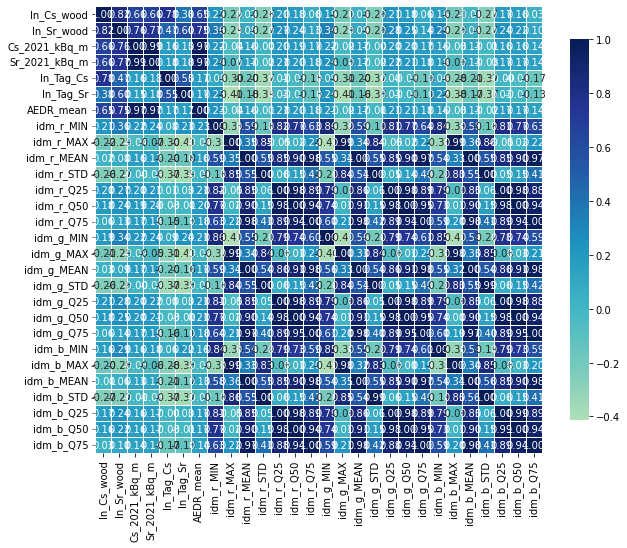

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
                                    'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
                                    'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Cs'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [11]:
# Columns in "X" data collections
X.head()

,idm_r_MIN,idm_r_MAX,idm_r_MEAN,idm_r_STD,idm_r_Q25,idm_r_Q50,idm_r_Q75,idm_g_MIN,idm_g_MAX,idm_g_MEAN,...,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75,Random1,Random2,Random3,Random4,Random5
0,0.018896,0.384033,0.057680,0.029676,0.041920,0.050301,0.062238,0.013972,0.376060,0.057730,...,0.059749,0.030217,0.043539,0.052312,0.064544,9.171188,10.793341,9.851341,9.428570,8.834624
1,0.020510,0.262630,0.056071,0.025267,0.042133,0.049856,0.061412,0.018636,0.289322,0.055371,...,0.057223,0.025515,0.043035,0.050941,0.062608,9.189908,10.400467,10.084128,8.993940,9.795019
2,0.021948,0.146006,0.054125,0.015072,0.043877,0.051675,0.061436,0.021988,0.170117,0.053174,...,0.056571,0.016629,0.045142,0.053495,0.064635,6.541396,12.221267,7.541960,11.380022,8.451500
3,0.019093,0.366594,0.059043,0.022897,0.044932,0.054252,0.067136,0.015969,0.348899,0.058043,...,0.060880,0.023964,0.046111,0.055601,0.069182,8.659111,9.837708,9.761272,10.780714,10.891201
4,0.016348,0.295941,0.056370,0.023413,0.042199,0.050681,0.063448,0.017970,0.280073,0.054908,...,0.057902,0.024283,0.043045,0.051566,0.065078,9.816151,6.574255,6.544688,5.410509,6.552671


In [12]:
# Columns in "y" data collections
y.head()

,ln_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.21734805254663725, 0.05646786728047659, -0.10143513518082314]
    Mean: 0.057
    Std: 0.130

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.33741808 1.16273965 1.18339801]
    Mean: 1.228
    Std: 0.078

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8361706529653498, 0.8238429900979184, 0.961265410360168]
    Mean: 0.874
    Std: 0.062

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model with rank: 1
Mean validation score: -0.237 (std: 0.357)
Parameters: {'colsample_bytree': 0.2549749516484937, 'gamma': 0.3070743733566193, 'learning_rate': 0.04315631636531027, 'max_depth': 2, 'n_estimators': 113, 'subsample': 0.357476784596425}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.17570653, 0.3847208 , 0.35484276, 0.56419454, 0.43719149,
       0.37965622, 0.16920104, 0.30278788, 0.27640839, 0.54661617]), 'std_fit_time': array([0.04152618, 0.00952386, 0.03490275, 0.0484662 , 0.00417138,
       0.01141451, 0.00661967, 0.03468389, 0.011223  , 0.0373765 ]), 'mean_score_time': array([0.00638542, 0.00632286, 0.0072866 , 0.00623698, 0.00632567,
       0.00622735, 0.00618773, 0.00615029, 0.00737624, 0.0067317 ]), 'std_score_time': array([9.51154001e-05, 1.06883131e-04, 1.22467875e-03, 6.22739836e-05,
       5.68919687e-05, 6.04310162e-05, 7.42479095e-05, 3.11332674e-05,
       1.99985128e-03, 2.89998247e-04]), 'param_colsample_bytree': masked_array(data=[0.918081456928572, 0.1415773519609718,
                   0.48771774053834893, 0.6220606208942387,
                   0.06397552487729816, 0.5435796235081961,
                   0.4682799877520535, 0.2549749516484937,
                   0.28856442932779564, 0.4052894577667892],
             m

In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.2549749516484937
Gamma: 0.3070743733566193
Learning_rate: 0.04315631636531027
Max_depth: 2
N_estimators: 113
Subsample: 0.357476784596425


# Estimation of a basic XGBoost model using Loops

In [21]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.28618	validation_1-rmse:1.35707
[1]	validation_0-rmse:1.26786	validation_1-rmse:1.34129


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.23577	validation_1-rmse:1.33173
[3]	validation_0-rmse:1.22194	validation_1-rmse:1.32077
[4]	validation_0-rmse:1.20404	validation_1-rmse:1.30293
[5]	validation_0-rmse:1.17907	validation_1-rmse:1.29759
[6]	validation_0-rmse:1.16581	validation_1-rmse:1.29018
[7]	validation_0-rmse:1.14996	validation_1-rmse:1.28511
[8]	validation_0-rmse:1.12539	validation_1-rmse:1.28179
[9]	validation_0-rmse:1.11088	validation_1-rmse:1.28617
[10]	validation_0-rmse:1.08627	validation_1-rmse:1.27436
[11]	validation_0-rmse:1.08075	validation_1-rmse:1.26209
[12]	validation_0-rmse:1.07061	validation_1-rmse:1.25761
[13]	validation_0-rmse:1.05809	validation_1-rmse:1.24724
[14]	validation_0-rmse:1.04919	validation_1-rmse:1.24638
[15]	validation_0-rmse:1.03016	validation_1-rmse:1.25204
[16]	validation_0-rmse:1.01517	validation_1-rmse:1.25058
[17]	validation_0-rmse:1.00343	validation_1-rmse:1.25020
[18]	validation_0-rmse:0.99219	validation_1-rmse:1.24116
[19]	validation_0-rmse:0.98388	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.21577	validation_1-rmse:1.28275
[5]	validation_0-rmse:1.18866	validation_1-rmse:1.27220
[6]	validation_0-rmse:1.16396	validation_1-rmse:1.24743
[7]	validation_0-rmse:1.14114	validation_1-rmse:1.23099
[8]	validation_0-rmse:1.12799	validation_1-rmse:1.22613
[9]	validation_0-rmse:1.11693	validation_1-rmse:1.21846
[10]	validation_0-rmse:1.10681	validation_1-rmse:1.20827
[11]	validation_0-rmse:1.09099	validation_1-rmse:1.19356
[12]	validation_0-rmse:1.07905	validation_1-rmse:1.19071
[13]	validation_0-rmse:1.06051	validation_1-rmse:1.18157
[14]	validation_0-rmse:1.04145	validation_1-rmse:1.16730
[15]	validation_0-rmse:1.03677	validation_1-rmse:1.16808
[16]	validation_0-rmse:1.02686	validation_1-rmse:1.16634
[17]	validation_0-rmse:1.01298	validation_1-rmse:1.16131
[18]	validation_0-rmse:1.00038	validation_1-rmse:1.15331
[19]	validation_0-rmse:0.98842	validation_1-rmse:1.15118
[20]	validation_0-rmse:0.97447	validation_1-rmse:1.14711
[21]	validation_0-rmse:0.97126	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96778	validation_1-rmse:1.21701
[23]	validation_0-rmse:0.95938	validation_1-rmse:1.21237
[24]	validation_0-rmse:0.95304	validation_1-rmse:1.21461
[25]	validation_0-rmse:0.94489	validation_1-rmse:1.21193
[26]	validation_0-rmse:0.93999	validation_1-rmse:1.21274
[27]	validation_0-rmse:0.93700	validation_1-rmse:1.20989
[28]	validation_0-rmse:0.93093	validation_1-rmse:1.21436
[29]	validation_0-rmse:0.92260	validation_1-rmse:1.20964
[30]	validation_0-rmse:0.92344	validation_1-rmse:1.21090
[31]	validation_0-rmse:0.91797	validation_1-rmse:1.20955
[32]	validation_0-rmse:0.91017	validation_1-rmse:1.21187
[33]	validation_0-rmse:0.90190	validation_1-rmse:1.21882
[34]	validation_0-rmse:0.90227	validation_1-rmse:1.21845
[35]	validation_0-rmse:0.89523	validation_1-rmse:1.21868
[36]	validation_0-rmse:0.88789	validation_1-rmse:1.21587
[37]	validation_0-rmse:0.88427	validation_1-rmse:1.20960
[38]	validation_0-rmse:0.87688	validation_1-rmse:1.20881
[39]	validation_0-rmse:0.87246	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.03005	validation_1-rmse:1.19546
[17]	validation_0-rmse:1.01375	validation_1-rmse:1.20020
[18]	validation_0-rmse:1.00156	validation_1-rmse:1.20491
[19]	validation_0-rmse:0.99502	validation_1-rmse:1.20707
[20]	validation_0-rmse:0.98772	validation_1-rmse:1.20932
[21]	validation_0-rmse:0.98169	validation_1-rmse:1.21213
[22]	validation_0-rmse:0.96840	validation_1-rmse:1.21685
[23]	validation_0-rmse:0.95509	validation_1-rmse:1.21262
[24]	validation_0-rmse:0.94413	validation_1-rmse:1.21894
[25]	validation_0-rmse:0.93593	validation_1-rmse:1.21681
[26]	validation_0-rmse:0.93184	validation_1-rmse:1.21002
[27]	validation_0-rmse:0.92465	validation_1-rmse:1.21351
[28]	validation_0-rmse:0.91268	validation_1-rmse:1.21916
[29]	validation_0-rmse:0.90222	validation_1-rmse:1.21851
[0]	validation_0-rmse:1.38900	validation_1-rmse:0.94602
[1]	validation_0-rmse:1.37398	validation_1-rmse:0.94242
[2]	validation_0-rmse:1.35067	validation_1-rmse:0.91738
[3]	validation_0-rmse:1.33460	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.05989	validation_1-rmse:0.79064
[22]	validation_0-rmse:1.04371	validation_1-rmse:0.79336
[23]	validation_0-rmse:1.03338	validation_1-rmse:0.79852
[24]	validation_0-rmse:1.01768	validation_1-rmse:0.80385
[25]	validation_0-rmse:1.01146	validation_1-rmse:0.81203
[26]	validation_0-rmse:1.00513	validation_1-rmse:0.81378
[27]	validation_0-rmse:0.99679	validation_1-rmse:0.82970
[28]	validation_0-rmse:0.99626	validation_1-rmse:0.82809
[29]	validation_0-rmse:0.99075	validation_1-rmse:0.83012
[30]	validation_0-rmse:0.98032	validation_1-rmse:0.81789
[31]	validation_0-rmse:0.97473	validation_1-rmse:0.81993
[32]	validation_0-rmse:0.97100	validation_1-rmse:0.81798
[33]	validation_0-rmse:0.96369	validation_1-rmse:0.81397
[34]	validation_0-rmse:0.95353	validation_1-rmse:0.81678
[0]	validation_0-rmse:1.32270	validation_1-rmse:1.24288
[1]	validation_0-rmse:1.30015	validation_1-rmse:1.23087
[2]	validation_0-rmse:1.26881	validation_1-rmse:1.22103
[3]	validation_0-rmse:1.24915	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.98895	validation_1-rmse:1.19382
[22]	validation_0-rmse:0.97264	validation_1-rmse:1.19656
[23]	validation_0-rmse:0.96110	validation_1-rmse:1.20410
[24]	validation_0-rmse:0.95514	validation_1-rmse:1.19416
[25]	validation_0-rmse:0.94661	validation_1-rmse:1.19365
[26]	validation_0-rmse:0.94036	validation_1-rmse:1.19448
[27]	validation_0-rmse:0.92759	validation_1-rmse:1.19685
[28]	validation_0-rmse:0.92032	validation_1-rmse:1.19387
[29]	validation_0-rmse:0.91960	validation_1-rmse:1.19519
[0]	validation_0-rmse:1.20968	validation_1-rmse:1.67622
[1]	validation_0-rmse:1.19632	validation_1-rmse:1.65153
[2]	validation_0-rmse:1.17402	validation_1-rmse:1.62938
[3]	validation_0-rmse:1.15788	validation_1-rmse:1.61949
[4]	validation_0-rmse:1.13973	validation_1-rmse:1.57959
[5]	validation_0-rmse:1.11389	validation_1-rmse:1.55322
[6]	validation_0-rmse:1.10172	validation_1-rmse:1.53853
[7]	validation_0-rmse:1.09450	validation_1-rmse:1.52106
[8]	validation_0-rmse:1.07982	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.97769	validation_1-rmse:1.39944
[20]	validation_0-rmse:0.97137	validation_1-rmse:1.38469
[21]	validation_0-rmse:0.96660	validation_1-rmse:1.37667
[22]	validation_0-rmse:0.95923	validation_1-rmse:1.36968
[23]	validation_0-rmse:0.95423	validation_1-rmse:1.38517
[24]	validation_0-rmse:0.94578	validation_1-rmse:1.37015
[25]	validation_0-rmse:0.93866	validation_1-rmse:1.36752
[26]	validation_0-rmse:0.93513	validation_1-rmse:1.36549
[27]	validation_0-rmse:0.93499	validation_1-rmse:1.35924
[28]	validation_0-rmse:0.93364	validation_1-rmse:1.35939
[29]	validation_0-rmse:0.91946	validation_1-rmse:1.34612
[30]	validation_0-rmse:0.91723	validation_1-rmse:1.34620
[31]	validation_0-rmse:0.90970	validation_1-rmse:1.33911
[32]	validation_0-rmse:0.90101	validation_1-rmse:1.33074
[33]	validation_0-rmse:0.89451	validation_1-rmse:1.31879
[34]	validation_0-rmse:0.89245	validation_1-rmse:1.32963
[35]	validation_0-rmse:0.88504	validation_1-rmse:1.31845
[36]	validation_0-rmse:0.88012	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.99266	validation_1-rmse:1.35020
[20]	validation_0-rmse:0.98058	validation_1-rmse:1.34462
[21]	validation_0-rmse:0.97595	validation_1-rmse:1.35206
[22]	validation_0-rmse:0.97144	validation_1-rmse:1.35746
[23]	validation_0-rmse:0.96503	validation_1-rmse:1.35626
[24]	validation_0-rmse:0.95884	validation_1-rmse:1.34724
[25]	validation_0-rmse:0.95531	validation_1-rmse:1.34658
[26]	validation_0-rmse:0.94041	validation_1-rmse:1.33755
[27]	validation_0-rmse:0.93250	validation_1-rmse:1.33144
[28]	validation_0-rmse:0.91876	validation_1-rmse:1.32958
[29]	validation_0-rmse:0.91027	validation_1-rmse:1.32868
[30]	validation_0-rmse:0.90689	validation_1-rmse:1.32555
[31]	validation_0-rmse:0.90068	validation_1-rmse:1.32053
[32]	validation_0-rmse:0.89673	validation_1-rmse:1.31387
[33]	validation_0-rmse:0.89401	validation_1-rmse:1.30794
[34]	validation_0-rmse:0.88844	validation_1-rmse:1.30712
[35]	validation_0-rmse:0.88791	validation_1-rmse:1.30478
[36]	validation_0-rmse:0.88247	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.10722	validation_1-rmse:1.19270
[12]	validation_0-rmse:1.09043	validation_1-rmse:1.17340
[13]	validation_0-rmse:1.06830	validation_1-rmse:1.15380
[14]	validation_0-rmse:1.06558	validation_1-rmse:1.14846
[15]	validation_0-rmse:1.05103	validation_1-rmse:1.14353
[16]	validation_0-rmse:1.03981	validation_1-rmse:1.14038
[17]	validation_0-rmse:1.02767	validation_1-rmse:1.12995
[18]	validation_0-rmse:1.02326	validation_1-rmse:1.12785
[19]	validation_0-rmse:1.00492	validation_1-rmse:1.11334
[20]	validation_0-rmse:1.00052	validation_1-rmse:1.11644
[21]	validation_0-rmse:0.99326	validation_1-rmse:1.11683
[22]	validation_0-rmse:0.98672	validation_1-rmse:1.11592
[23]	validation_0-rmse:0.97866	validation_1-rmse:1.10603
[24]	validation_0-rmse:0.96655	validation_1-rmse:1.09975
[25]	validation_0-rmse:0.95598	validation_1-rmse:1.08810
[26]	validation_0-rmse:0.95357	validation_1-rmse:1.08709
[27]	validation_0-rmse:0.95174	validation_1-rmse:1.08813
[28]	validation_0-rmse:0.94078	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.04776	validation_1-rmse:1.30907
[14]	validation_0-rmse:1.04248	validation_1-rmse:1.30255
[15]	validation_0-rmse:1.02987	validation_1-rmse:1.29482
[16]	validation_0-rmse:1.02933	validation_1-rmse:1.28508
[17]	validation_0-rmse:1.01489	validation_1-rmse:1.26049
[18]	validation_0-rmse:0.99832	validation_1-rmse:1.24510
[19]	validation_0-rmse:0.99061	validation_1-rmse:1.22394
[20]	validation_0-rmse:0.98469	validation_1-rmse:1.21408
[21]	validation_0-rmse:0.98108	validation_1-rmse:1.20691
[22]	validation_0-rmse:0.97187	validation_1-rmse:1.19220
[23]	validation_0-rmse:0.96414	validation_1-rmse:1.17137
[24]	validation_0-rmse:0.95836	validation_1-rmse:1.17179
[25]	validation_0-rmse:0.94844	validation_1-rmse:1.16862
[26]	validation_0-rmse:0.94288	validation_1-rmse:1.16520
[27]	validation_0-rmse:0.93413	validation_1-rmse:1.14363
[28]	validation_0-rmse:0.93035	validation_1-rmse:1.12778
[29]	validation_0-rmse:0.93058	validation_1-rmse:1.13576
[30]	validation_0-rmse:0.92796	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.06615	validation_1-rmse:1.09759
[17]	validation_0-rmse:1.05355	validation_1-rmse:1.09828
[18]	validation_0-rmse:1.04546	validation_1-rmse:1.08224
[19]	validation_0-rmse:1.03349	validation_1-rmse:1.07999
[20]	validation_0-rmse:1.02175	validation_1-rmse:1.07517
[21]	validation_0-rmse:1.01152	validation_1-rmse:1.06508
[22]	validation_0-rmse:1.00039	validation_1-rmse:1.05994
[23]	validation_0-rmse:0.99071	validation_1-rmse:1.05281
[24]	validation_0-rmse:0.97951	validation_1-rmse:1.04918
[25]	validation_0-rmse:0.97281	validation_1-rmse:1.04394
[26]	validation_0-rmse:0.96670	validation_1-rmse:1.03720
[27]	validation_0-rmse:0.95552	validation_1-rmse:1.03058
[28]	validation_0-rmse:0.95135	validation_1-rmse:1.03497
[29]	validation_0-rmse:0.94119	validation_1-rmse:1.02468
[30]	validation_0-rmse:0.93594	validation_1-rmse:1.02780
[31]	validation_0-rmse:0.93096	validation_1-rmse:1.01117
[32]	validation_0-rmse:0.92443	validation_1-rmse:1.01048
[33]	validation_0-rmse:0.92068	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.21533	validation_1-rmse:1.15289
[6]	validation_0-rmse:1.19518	validation_1-rmse:1.13712
[7]	validation_0-rmse:1.17857	validation_1-rmse:1.12864
[8]	validation_0-rmse:1.16023	validation_1-rmse:1.13163
[9]	validation_0-rmse:1.14212	validation_1-rmse:1.12983
[10]	validation_0-rmse:1.13177	validation_1-rmse:1.12006
[11]	validation_0-rmse:1.12758	validation_1-rmse:1.12146
[12]	validation_0-rmse:1.11021	validation_1-rmse:1.11813
[13]	validation_0-rmse:1.09608	validation_1-rmse:1.11126
[14]	validation_0-rmse:1.07959	validation_1-rmse:1.10946
[15]	validation_0-rmse:1.06350	validation_1-rmse:1.10948
[16]	validation_0-rmse:1.04833	validation_1-rmse:1.10984
[17]	validation_0-rmse:1.03253	validation_1-rmse:1.10944
[18]	validation_0-rmse:1.02788	validation_1-rmse:1.10920
[19]	validation_0-rmse:1.01419	validation_1-rmse:1.10592
[20]	validation_0-rmse:1.00570	validation_1-rmse:1.11245
[21]	validation_0-rmse:0.99181	validation_1-rmse:1.10533
[22]	validation_0-rmse:0.98498	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.18392	validation_1-rmse:1.04497
[10]	validation_0-rmse:1.16651	validation_1-rmse:1.04154
[11]	validation_0-rmse:1.13360	validation_1-rmse:1.03004
[12]	validation_0-rmse:1.12122	validation_1-rmse:1.02911
[13]	validation_0-rmse:1.10645	validation_1-rmse:1.02582
[14]	validation_0-rmse:1.08442	validation_1-rmse:1.01761
[15]	validation_0-rmse:1.07208	validation_1-rmse:1.01503
[16]	validation_0-rmse:1.06373	validation_1-rmse:1.01112
[17]	validation_0-rmse:1.05564	validation_1-rmse:1.00827
[18]	validation_0-rmse:1.04176	validation_1-rmse:1.00169
[19]	validation_0-rmse:1.02254	validation_1-rmse:1.00313
[20]	validation_0-rmse:1.01515	validation_1-rmse:1.00174
[21]	validation_0-rmse:1.01053	validation_1-rmse:0.99762
[22]	validation_0-rmse:1.00944	validation_1-rmse:0.99715
[23]	validation_0-rmse:1.00738	validation_1-rmse:1.00008
[24]	validation_0-rmse:0.99779	validation_1-rmse:0.99825
[25]	validation_0-rmse:0.99111	validation_1-rmse:0.99098
[26]	validation_0-rmse:0.97952	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.07560	validation_1-rmse:1.51026
[11]	validation_0-rmse:1.06325	validation_1-rmse:1.50222
[12]	validation_0-rmse:1.04875	validation_1-rmse:1.48947
[13]	validation_0-rmse:1.03318	validation_1-rmse:1.48146
[14]	validation_0-rmse:1.01625	validation_1-rmse:1.47109
[15]	validation_0-rmse:1.00402	validation_1-rmse:1.45899
[16]	validation_0-rmse:0.98992	validation_1-rmse:1.45042
[17]	validation_0-rmse:0.98261	validation_1-rmse:1.45151
[18]	validation_0-rmse:0.97158	validation_1-rmse:1.43861
[19]	validation_0-rmse:0.94897	validation_1-rmse:1.42957
[20]	validation_0-rmse:0.93846	validation_1-rmse:1.42074
[21]	validation_0-rmse:0.92809	validation_1-rmse:1.41287
[22]	validation_0-rmse:0.91541	validation_1-rmse:1.40701
[23]	validation_0-rmse:0.91303	validation_1-rmse:1.40614
[24]	validation_0-rmse:0.90142	validation_1-rmse:1.39532
[25]	validation_0-rmse:0.89464	validation_1-rmse:1.39131
[26]	validation_0-rmse:0.88420	validation_1-rmse:1.38743
[27]	validation_0-rmse:0.87424	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97685	validation_1-rmse:1.48620
[18]	validation_0-rmse:0.96707	validation_1-rmse:1.47536
[19]	validation_0-rmse:0.96146	validation_1-rmse:1.47101
[20]	validation_0-rmse:0.94886	validation_1-rmse:1.45660
[21]	validation_0-rmse:0.94757	validation_1-rmse:1.44247
[22]	validation_0-rmse:0.93885	validation_1-rmse:1.43590
[23]	validation_0-rmse:0.93727	validation_1-rmse:1.43619
[24]	validation_0-rmse:0.92494	validation_1-rmse:1.42653
[25]	validation_0-rmse:0.91671	validation_1-rmse:1.42321
[26]	validation_0-rmse:0.90776	validation_1-rmse:1.41183
[27]	validation_0-rmse:0.90328	validation_1-rmse:1.40724
[28]	validation_0-rmse:0.89486	validation_1-rmse:1.40061
[29]	validation_0-rmse:0.89144	validation_1-rmse:1.40093
[30]	validation_0-rmse:0.88104	validation_1-rmse:1.39075
[31]	validation_0-rmse:0.87264	validation_1-rmse:1.38102
[32]	validation_0-rmse:0.86687	validation_1-rmse:1.38123
[33]	validation_0-rmse:0.86038	validation_1-rmse:1.38245
[34]	validation_0-rmse:0.85514	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.21814	validation_1-rmse:1.18226
[6]	validation_0-rmse:1.19790	validation_1-rmse:1.18113
[7]	validation_0-rmse:1.18532	validation_1-rmse:1.17932
[8]	validation_0-rmse:1.16793	validation_1-rmse:1.16280
[9]	validation_0-rmse:1.15043	validation_1-rmse:1.14496
[10]	validation_0-rmse:1.13646	validation_1-rmse:1.13688
[11]	validation_0-rmse:1.12236	validation_1-rmse:1.11928
[12]	validation_0-rmse:1.10862	validation_1-rmse:1.10606
[13]	validation_0-rmse:1.09407	validation_1-rmse:1.09626
[14]	validation_0-rmse:1.08438	validation_1-rmse:1.07645
[15]	validation_0-rmse:1.06989	validation_1-rmse:1.05550
[16]	validation_0-rmse:1.06150	validation_1-rmse:1.05097
[17]	validation_0-rmse:1.05182	validation_1-rmse:1.03892
[18]	validation_0-rmse:1.04010	validation_1-rmse:1.03573
[19]	validation_0-rmse:1.03308	validation_1-rmse:1.03419
[20]	validation_0-rmse:1.02249	validation_1-rmse:1.02873
[21]	validation_0-rmse:1.01430	validation_1-rmse:1.01850
[22]	validation_0-rmse:1.00566	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.00130	validation_1-rmse:1.44504
[17]	validation_0-rmse:0.99389	validation_1-rmse:1.43897
[18]	validation_0-rmse:0.98470	validation_1-rmse:1.43194
[19]	validation_0-rmse:0.97664	validation_1-rmse:1.42077
[20]	validation_0-rmse:0.96822	validation_1-rmse:1.41927
[21]	validation_0-rmse:0.96081	validation_1-rmse:1.41710
[22]	validation_0-rmse:0.95109	validation_1-rmse:1.41344
[23]	validation_0-rmse:0.94671	validation_1-rmse:1.41431
[24]	validation_0-rmse:0.93565	validation_1-rmse:1.40809
[25]	validation_0-rmse:0.93264	validation_1-rmse:1.40882
[26]	validation_0-rmse:0.91744	validation_1-rmse:1.38159
[27]	validation_0-rmse:0.91718	validation_1-rmse:1.38974
[28]	validation_0-rmse:0.90984	validation_1-rmse:1.37905
[29]	validation_0-rmse:0.90201	validation_1-rmse:1.37731
[30]	validation_0-rmse:0.89396	validation_1-rmse:1.38263
[31]	validation_0-rmse:0.88812	validation_1-rmse:1.37039
[32]	validation_0-rmse:0.88252	validation_1-rmse:1.36278
[33]	validation_0-rmse:0.87276	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.19360	validation_1-rmse:1.26907
[7]	validation_0-rmse:1.17274	validation_1-rmse:1.25368
[8]	validation_0-rmse:1.15723	validation_1-rmse:1.25446
[9]	validation_0-rmse:1.15265	validation_1-rmse:1.24845
[10]	validation_0-rmse:1.13466	validation_1-rmse:1.23628
[11]	validation_0-rmse:1.12426	validation_1-rmse:1.22810
[12]	validation_0-rmse:1.10792	validation_1-rmse:1.21370
[13]	validation_0-rmse:1.09831	validation_1-rmse:1.20606
[14]	validation_0-rmse:1.09647	validation_1-rmse:1.21010
[15]	validation_0-rmse:1.08497	validation_1-rmse:1.20389
[16]	validation_0-rmse:1.06675	validation_1-rmse:1.20109
[17]	validation_0-rmse:1.05410	validation_1-rmse:1.19144
[18]	validation_0-rmse:1.04360	validation_1-rmse:1.18749
[19]	validation_0-rmse:1.03575	validation_1-rmse:1.18108
[20]	validation_0-rmse:1.02800	validation_1-rmse:1.18089
[21]	validation_0-rmse:1.01182	validation_1-rmse:1.17538
[22]	validation_0-rmse:1.00762	validation_1-rmse:1.17033
[23]	validation_0-rmse:0.99204	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.04707	validation_1-rmse:1.03692
[19]	validation_0-rmse:1.03038	validation_1-rmse:1.03232
[20]	validation_0-rmse:1.02241	validation_1-rmse:1.03316
[21]	validation_0-rmse:1.01949	validation_1-rmse:1.02625
[22]	validation_0-rmse:1.00821	validation_1-rmse:1.02351
[23]	validation_0-rmse:0.99698	validation_1-rmse:1.01446
[24]	validation_0-rmse:0.99259	validation_1-rmse:1.01257
[25]	validation_0-rmse:0.98889	validation_1-rmse:1.01285
[26]	validation_0-rmse:0.98550	validation_1-rmse:1.01107
[27]	validation_0-rmse:0.97939	validation_1-rmse:1.00826
[28]	validation_0-rmse:0.97255	validation_1-rmse:1.01050
[29]	validation_0-rmse:0.96606	validation_1-rmse:1.01098
[30]	validation_0-rmse:0.95888	validation_1-rmse:1.01048
[31]	validation_0-rmse:0.95831	validation_1-rmse:1.01104
[32]	validation_0-rmse:0.96041	validation_1-rmse:1.01580
[33]	validation_0-rmse:0.94914	validation_1-rmse:1.01201
[34]	validation_0-rmse:0.93995	validation_1-rmse:1.00384
[35]	validation_0-rmse:0.93714	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.01923	validation_1-rmse:1.27131
[17]	validation_0-rmse:1.00869	validation_1-rmse:1.25777
[18]	validation_0-rmse:1.00236	validation_1-rmse:1.25471
[19]	validation_0-rmse:0.99293	validation_1-rmse:1.23791
[20]	validation_0-rmse:0.98309	validation_1-rmse:1.22470
[21]	validation_0-rmse:0.97227	validation_1-rmse:1.21108
[22]	validation_0-rmse:0.97018	validation_1-rmse:1.21485
[23]	validation_0-rmse:0.95588	validation_1-rmse:1.20122
[24]	validation_0-rmse:0.94768	validation_1-rmse:1.19758
[25]	validation_0-rmse:0.93645	validation_1-rmse:1.18557
[26]	validation_0-rmse:0.93256	validation_1-rmse:1.18525
[27]	validation_0-rmse:0.93317	validation_1-rmse:1.18416
[28]	validation_0-rmse:0.92527	validation_1-rmse:1.17667
[29]	validation_0-rmse:0.92013	validation_1-rmse:1.17268
[30]	validation_0-rmse:0.91330	validation_1-rmse:1.16253
[31]	validation_0-rmse:0.90630	validation_1-rmse:1.15001
[32]	validation_0-rmse:0.90042	validation_1-rmse:1.14826
[33]	validation_0-rmse:0.89447	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.29685	validation_1-rmse:1.22261
[2]	validation_0-rmse:1.27317	validation_1-rmse:1.20682
[3]	validation_0-rmse:1.25786	validation_1-rmse:1.20717
[4]	validation_0-rmse:1.23256	validation_1-rmse:1.19937
[5]	validation_0-rmse:1.21111	validation_1-rmse:1.18479
[6]	validation_0-rmse:1.19001	validation_1-rmse:1.17004
[7]	validation_0-rmse:1.17536	validation_1-rmse:1.15910
[8]	validation_0-rmse:1.15939	validation_1-rmse:1.15022
[9]	validation_0-rmse:1.14694	validation_1-rmse:1.14594
[10]	validation_0-rmse:1.13236	validation_1-rmse:1.13963
[11]	validation_0-rmse:1.11749	validation_1-rmse:1.13568
[12]	validation_0-rmse:1.10463	validation_1-rmse:1.13259
[13]	validation_0-rmse:1.09821	validation_1-rmse:1.12363
[14]	validation_0-rmse:1.08720	validation_1-rmse:1.11223
[15]	validation_0-rmse:1.07360	validation_1-rmse:1.10717
[16]	validation_0-rmse:1.05725	validation_1-rmse:1.10746
[17]	validation_0-rmse:1.04659	validation_1-rmse:1.11318
[18]	validation_0-rmse:1.03588	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.11343	validation_1-rmse:0.89081
[16]	validation_0-rmse:1.11144	validation_1-rmse:0.89291
[17]	validation_0-rmse:1.09919	validation_1-rmse:0.87358
[18]	validation_0-rmse:1.08968	validation_1-rmse:0.87314
[19]	validation_0-rmse:1.06836	validation_1-rmse:0.85892
[20]	validation_0-rmse:1.06054	validation_1-rmse:0.85541
[21]	validation_0-rmse:1.05143	validation_1-rmse:0.84755
[22]	validation_0-rmse:1.04546	validation_1-rmse:0.84740
[23]	validation_0-rmse:1.03063	validation_1-rmse:0.84060
[24]	validation_0-rmse:1.02409	validation_1-rmse:0.83485
[25]	validation_0-rmse:1.01587	validation_1-rmse:0.82623
[26]	validation_0-rmse:1.00548	validation_1-rmse:0.81766
[27]	validation_0-rmse:0.99639	validation_1-rmse:0.80871
[28]	validation_0-rmse:0.98860	validation_1-rmse:0.80444
[29]	validation_0-rmse:0.98512	validation_1-rmse:0.80375
[30]	validation_0-rmse:0.97575	validation_1-rmse:0.80606
[31]	validation_0-rmse:0.96868	validation_1-rmse:0.80685
[32]	validation_0-rmse:0.96562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.26457	validation_1-rmse:1.33693
[2]	validation_0-rmse:1.23212	validation_1-rmse:1.31256
[3]	validation_0-rmse:1.21067	validation_1-rmse:1.29673
[4]	validation_0-rmse:1.18537	validation_1-rmse:1.26309
[5]	validation_0-rmse:1.17351	validation_1-rmse:1.25632
[6]	validation_0-rmse:1.16097	validation_1-rmse:1.24531
[7]	validation_0-rmse:1.14776	validation_1-rmse:1.24704
[8]	validation_0-rmse:1.12995	validation_1-rmse:1.23434
[9]	validation_0-rmse:1.11224	validation_1-rmse:1.22343
[10]	validation_0-rmse:1.09735	validation_1-rmse:1.20818
[11]	validation_0-rmse:1.09500	validation_1-rmse:1.20694
[12]	validation_0-rmse:1.07936	validation_1-rmse:1.19287
[13]	validation_0-rmse:1.07091	validation_1-rmse:1.19061
[14]	validation_0-rmse:1.06246	validation_1-rmse:1.18466
[15]	validation_0-rmse:1.05060	validation_1-rmse:1.17404
[16]	validation_0-rmse:1.02701	validation_1-rmse:1.16676
[17]	validation_0-rmse:1.01863	validation_1-rmse:1.16186
[18]	validation_0-rmse:1.00649	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.25916	validation_1-rmse:1.07311
[5]	validation_0-rmse:1.23938	validation_1-rmse:1.05893
[6]	validation_0-rmse:1.21969	validation_1-rmse:1.03558
[7]	validation_0-rmse:1.20136	validation_1-rmse:1.01634
[8]	validation_0-rmse:1.19150	validation_1-rmse:1.00532
[9]	validation_0-rmse:1.17270	validation_1-rmse:0.98727
[10]	validation_0-rmse:1.15864	validation_1-rmse:0.97091
[11]	validation_0-rmse:1.14548	validation_1-rmse:0.95853
[12]	validation_0-rmse:1.13597	validation_1-rmse:0.95551
[13]	validation_0-rmse:1.12178	validation_1-rmse:0.94224
[14]	validation_0-rmse:1.10500	validation_1-rmse:0.92817
[15]	validation_0-rmse:1.09151	validation_1-rmse:0.91892
[16]	validation_0-rmse:1.07498	validation_1-rmse:0.90954
[17]	validation_0-rmse:1.06255	validation_1-rmse:0.90162
[18]	validation_0-rmse:1.05353	validation_1-rmse:0.89131
[19]	validation_0-rmse:1.04664	validation_1-rmse:0.88149
[20]	validation_0-rmse:1.03437	validation_1-rmse:0.88068
[21]	validation_0-rmse:1.02279	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.02455	validation_1-rmse:1.54718
[12]	validation_0-rmse:1.01487	validation_1-rmse:1.53666
[13]	validation_0-rmse:1.00723	validation_1-rmse:1.52746
[14]	validation_0-rmse:0.99507	validation_1-rmse:1.51173
[15]	validation_0-rmse:0.98560	validation_1-rmse:1.51873
[16]	validation_0-rmse:0.97329	validation_1-rmse:1.50301
[17]	validation_0-rmse:0.95969	validation_1-rmse:1.48818
[18]	validation_0-rmse:0.95401	validation_1-rmse:1.48604
[19]	validation_0-rmse:0.94133	validation_1-rmse:1.46583
[20]	validation_0-rmse:0.93749	validation_1-rmse:1.45186
[21]	validation_0-rmse:0.93416	validation_1-rmse:1.45703
[22]	validation_0-rmse:0.92653	validation_1-rmse:1.44043
[23]	validation_0-rmse:0.91897	validation_1-rmse:1.42688
[24]	validation_0-rmse:0.91401	validation_1-rmse:1.41880
[25]	validation_0-rmse:0.90993	validation_1-rmse:1.40778
[26]	validation_0-rmse:0.90247	validation_1-rmse:1.39787
[27]	validation_0-rmse:0.89791	validation_1-rmse:1.39065
[28]	validation_0-rmse:0.89154	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.32191	validation_1-rmse:0.83155
[3]	validation_0-rmse:1.30152	validation_1-rmse:0.82336
[4]	validation_0-rmse:1.28708	validation_1-rmse:0.82544
[5]	validation_0-rmse:1.26035	validation_1-rmse:0.81973
[6]	validation_0-rmse:1.23474	validation_1-rmse:0.81409
[7]	validation_0-rmse:1.21313	validation_1-rmse:0.80336
[8]	validation_0-rmse:1.19392	validation_1-rmse:0.80441
[9]	validation_0-rmse:1.17227	validation_1-rmse:0.81176
[10]	validation_0-rmse:1.15619	validation_1-rmse:0.82186
[11]	validation_0-rmse:1.15036	validation_1-rmse:0.82129
[12]	validation_0-rmse:1.14326	validation_1-rmse:0.82278
[13]	validation_0-rmse:1.12936	validation_1-rmse:0.81508
[14]	validation_0-rmse:1.11627	validation_1-rmse:0.81737
[15]	validation_0-rmse:1.10307	validation_1-rmse:0.82953
[16]	validation_0-rmse:1.08401	validation_1-rmse:0.83549
[17]	validation_0-rmse:1.07091	validation_1-rmse:0.84753
[18]	validation_0-rmse:1.05840	validation_1-rmse:0.84866
[19]	validation_0-rmse:1.04937	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03985	validation_1-rmse:0.94281
[21]	validation_0-rmse:1.03150	validation_1-rmse:0.95040
[22]	validation_0-rmse:1.02460	validation_1-rmse:0.94849
[23]	validation_0-rmse:1.01313	validation_1-rmse:0.95081
[24]	validation_0-rmse:1.00554	validation_1-rmse:0.95199
[25]	validation_0-rmse:0.99246	validation_1-rmse:0.96305
[26]	validation_0-rmse:0.98848	validation_1-rmse:0.96926
[0]	validation_0-rmse:1.35167	validation_1-rmse:1.09058
[1]	validation_0-rmse:1.32773	validation_1-rmse:1.06661
[2]	validation_0-rmse:1.30969	validation_1-rmse:1.06353
[3]	validation_0-rmse:1.29119	validation_1-rmse:1.04860
[4]	validation_0-rmse:1.26549	validation_1-rmse:1.02523
[5]	validation_0-rmse:1.24731	validation_1-rmse:1.00870
[6]	validation_0-rmse:1.22628	validation_1-rmse:0.98880
[7]	validation_0-rmse:1.20886	validation_1-rmse:0.97532
[8]	validation_0-rmse:1.19176	validation_1-rmse:0.96456
[9]	validation_0-rmse:1.17559	validation_1-rmse:0.94833
[10]	validation_0-rmse:1.16500	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03373	validation_1-rmse:0.89169
[21]	validation_0-rmse:1.02795	validation_1-rmse:0.89439
[22]	validation_0-rmse:1.01821	validation_1-rmse:0.88482
[23]	validation_0-rmse:1.01709	validation_1-rmse:0.89043
[24]	validation_0-rmse:1.01210	validation_1-rmse:0.88632
[25]	validation_0-rmse:1.00588	validation_1-rmse:0.88157
[26]	validation_0-rmse:0.99843	validation_1-rmse:0.87643
[27]	validation_0-rmse:0.99043	validation_1-rmse:0.86834
[28]	validation_0-rmse:0.97897	validation_1-rmse:0.86381
[29]	validation_0-rmse:0.96979	validation_1-rmse:0.85501
[30]	validation_0-rmse:0.96977	validation_1-rmse:0.85599
[31]	validation_0-rmse:0.95613	validation_1-rmse:0.84440
[32]	validation_0-rmse:0.95166	validation_1-rmse:0.84142
[33]	validation_0-rmse:0.94482	validation_1-rmse:0.83476
[34]	validation_0-rmse:0.94173	validation_1-rmse:0.82895
[35]	validation_0-rmse:0.94077	validation_1-rmse:0.82376
[36]	validation_0-rmse:0.92831	validation_1-rmse:0.81982
[37]	validation_0-rmse:0.92396	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.99621	validation_1-rmse:1.34878
[21]	validation_0-rmse:0.98214	validation_1-rmse:1.32264
[22]	validation_0-rmse:0.97225	validation_1-rmse:1.30726
[23]	validation_0-rmse:0.96472	validation_1-rmse:1.29723
[24]	validation_0-rmse:0.96069	validation_1-rmse:1.29311
[25]	validation_0-rmse:0.95599	validation_1-rmse:1.27781
[26]	validation_0-rmse:0.94871	validation_1-rmse:1.27398
[27]	validation_0-rmse:0.94528	validation_1-rmse:1.27647
[28]	validation_0-rmse:0.93605	validation_1-rmse:1.26769
[29]	validation_0-rmse:0.92582	validation_1-rmse:1.24950
[30]	validation_0-rmse:0.92218	validation_1-rmse:1.23860
[31]	validation_0-rmse:0.91427	validation_1-rmse:1.22370
[32]	validation_0-rmse:0.91419	validation_1-rmse:1.22695
[33]	validation_0-rmse:0.90797	validation_1-rmse:1.21281
[34]	validation_0-rmse:0.90437	validation_1-rmse:1.21096
[35]	validation_0-rmse:0.90296	validation_1-rmse:1.20508
[36]	validation_0-rmse:0.89627	validation_1-rmse:1.19385
[37]	validation_0-rmse:0.89248	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07052	validation_1-rmse:1.01605
[21]	validation_0-rmse:1.06174	validation_1-rmse:1.00245
[22]	validation_0-rmse:1.04884	validation_1-rmse:0.99379
[23]	validation_0-rmse:1.04293	validation_1-rmse:0.99456
[24]	validation_0-rmse:1.02868	validation_1-rmse:1.00271
[25]	validation_0-rmse:1.01921	validation_1-rmse:0.99411
[26]	validation_0-rmse:1.02175	validation_1-rmse:0.99787
[27]	validation_0-rmse:1.01050	validation_1-rmse:0.98417
[28]	validation_0-rmse:1.00250	validation_1-rmse:0.97483
[29]	validation_0-rmse:0.99313	validation_1-rmse:0.97123
[30]	validation_0-rmse:0.98676	validation_1-rmse:0.96035
[31]	validation_0-rmse:0.97971	validation_1-rmse:0.95474
[32]	validation_0-rmse:0.97584	validation_1-rmse:0.95715
[33]	validation_0-rmse:0.96830	validation_1-rmse:0.94394
[34]	validation_0-rmse:0.95999	validation_1-rmse:0.94167
[35]	validation_0-rmse:0.95061	validation_1-rmse:0.92842
[36]	validation_0-rmse:0.94630	validation_1-rmse:0.93304
[37]	validation_0-rmse:0.94021	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [23]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [24]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 50.933, median: 42.0,
 pred. interval (P(0.025)-P(0.975)): 7.0-109.55, 
 conf. interval (p-value=0.95): 31.334-58.375 
***
Aggregate bias statistic: 
 mean: 3.418, median: 3.355,
 pred. interval (P(0.025)-P(0.975)): -2.765-11.657, 
 conf. interval (p-value=0.95): 1.966-4.951 
***
Aggregate RMSE statistic: 
 mean: 1.062, median: 1.076, pred. interval (P(0.025)-P(0.975)): 0.774-1.326, 
 conf. interval (p-value=0.95): 0.978-1.165 
***
Aggregate MSE statistic: 
 mean: 1.157, median: 1.157, pred. interval (P(0.025)-P(0.975)): 0.599-1.759, 
 conf. interval (p-value=0.95): 0.97-1.368 
***
Aggregate R^2 statistic: 
 mean: 0.078, median: 0.081, pred. interval (P(0.025)-P(0.975)): -0.243-0.288, 
 conf. interval (p-value=0.95): 0.032-0.151 
***
Aggregate bias(%) statistic: 
 mean: -6.965, median: 3.355, pred. interval (P(0.025)-P(0.975)): -44.791-39.094, 
 conf. interval (p-value=0.95): -13.015--2.349 
***
Aggregate RMSE(%) statistic: 
 me

# ***Training on all data***

# Creating a final XGBoost model

In [25]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [26]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [27]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.31552
[1]	validation_0-rmse:1.29724
[2]	validation_0-rmse:1.28441


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.25878
[4]	validation_0-rmse:1.23021
[5]	validation_0-rmse:1.21591
[6]	validation_0-rmse:1.19019
[7]	validation_0-rmse:1.17813
[8]	validation_0-rmse:1.16536
[9]	validation_0-rmse:1.14428
[10]	validation_0-rmse:1.13939
[11]	validation_0-rmse:1.12376
[12]	validation_0-rmse:1.10983
[13]	validation_0-rmse:1.09532
[14]	validation_0-rmse:1.08284
[15]	validation_0-rmse:1.06886
[16]	validation_0-rmse:1.05562
[17]	validation_0-rmse:1.04885
[18]	validation_0-rmse:1.04096
[19]	validation_0-rmse:1.03330
[20]	validation_0-rmse:1.02148
[21]	validation_0-rmse:1.01257
[22]	validation_0-rmse:0.99934
[23]	validation_0-rmse:0.99292
[24]	validation_0-rmse:0.98392
[25]	validation_0-rmse:0.97753
[26]	validation_0-rmse:0.97183
[27]	validation_0-rmse:0.96247
[28]	validation_0-rmse:0.95599
[29]	validation_0-rmse:0.94480
[30]	validation_0-rmse:0.94446
[31]	validation_0-rmse:0.94256
[32]	validation_0-rmse:0.93224
[33]	validation_0-rmse:0.92966
[34]	validation_0-rmse:0.92410
[35]	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [28]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 112


In [29]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

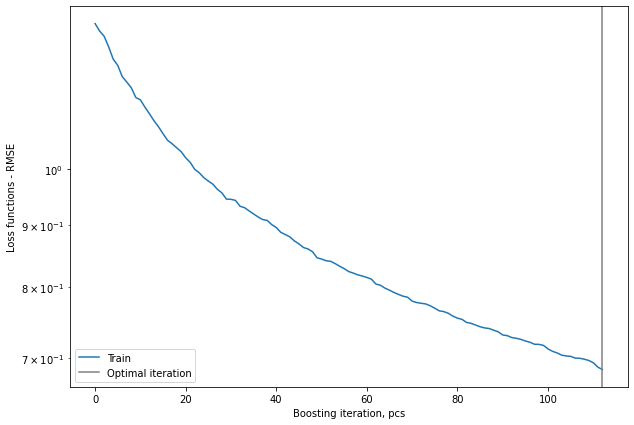

In [30]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [31]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [32]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -10.34
RMSE: 0.7
Relative RMSE(%):  -2.721
MSE: 0.5
R square: 61.1%


In [33]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.110
a1: 0.464
R^2: 0.681
Uncertainty
a0: -0.11+/-0.04
a1: 0.464+/-0.032


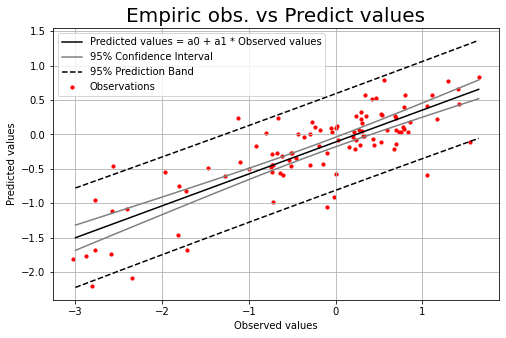

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

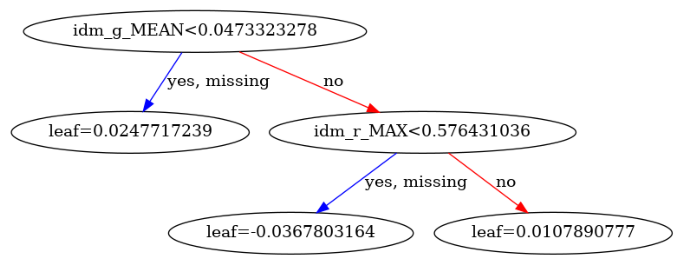

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

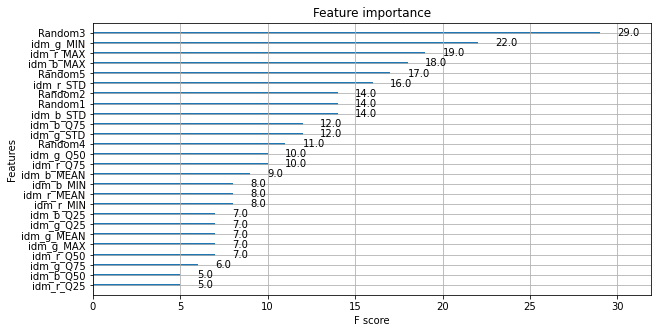

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

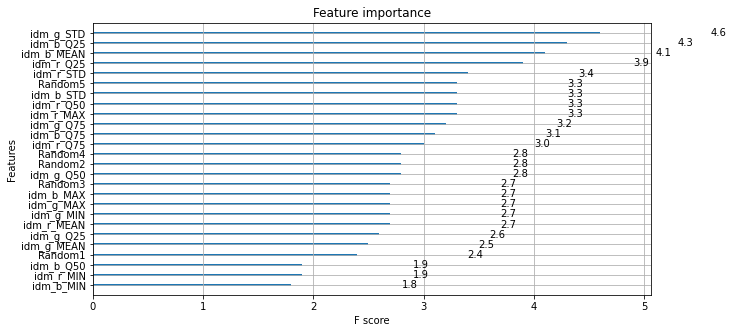

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

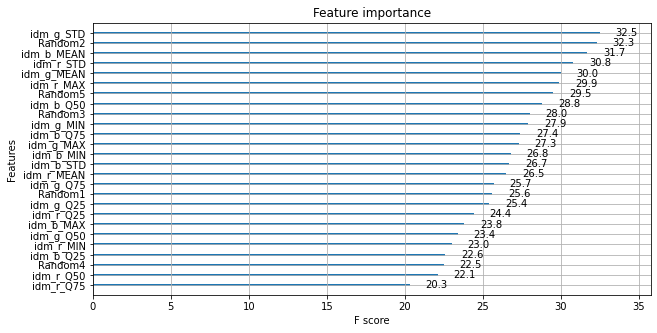

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


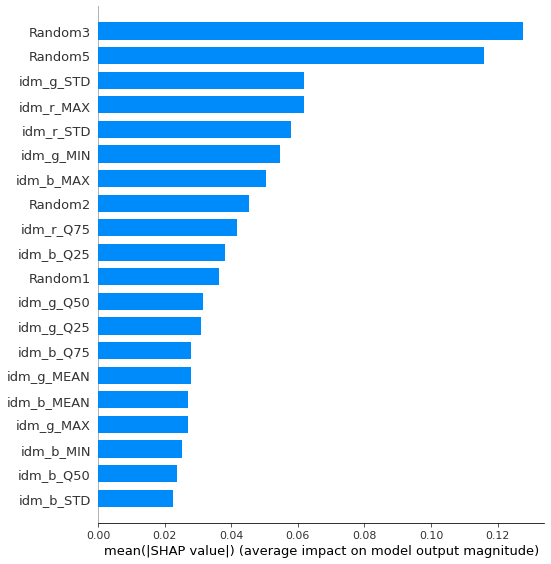

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

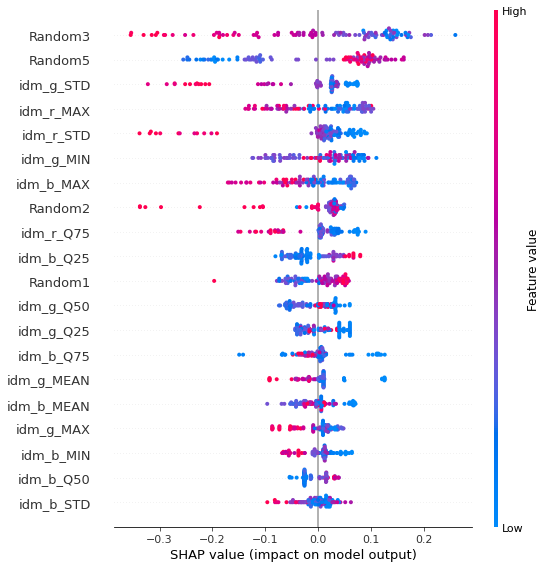

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

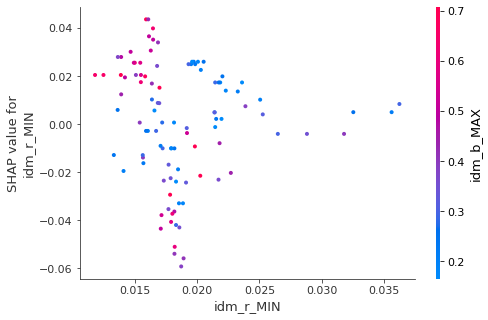

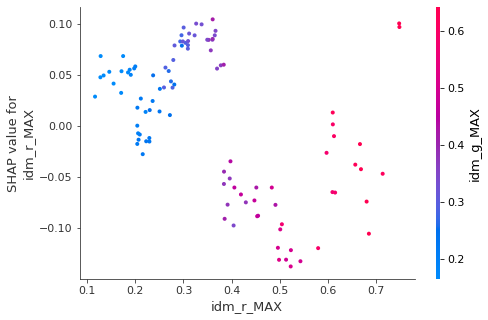

invalid value encountered in true_divide
invalid value encountered in true_divide


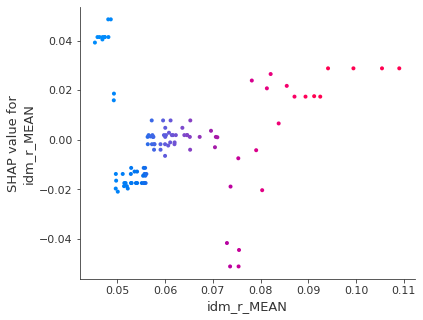

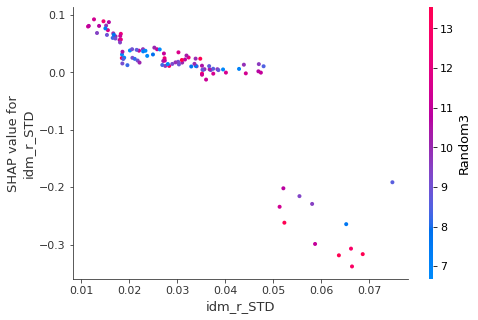

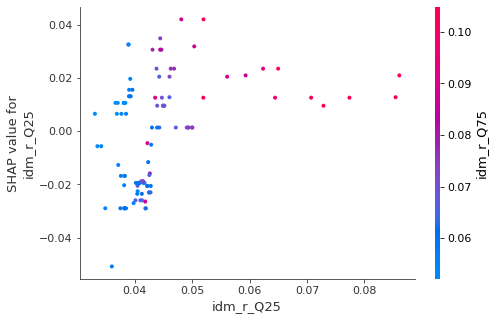

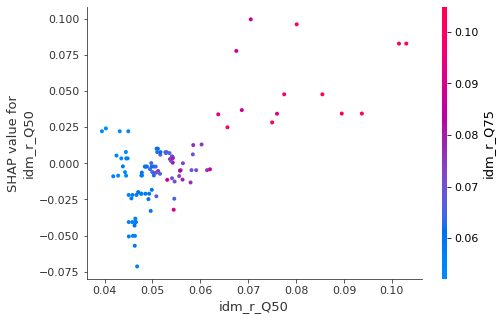

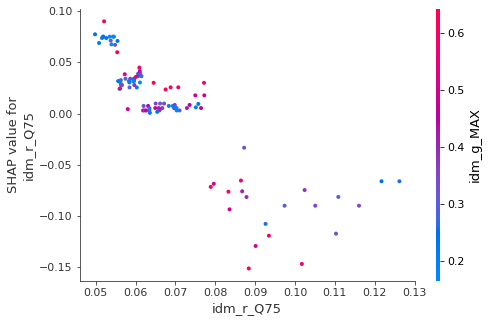

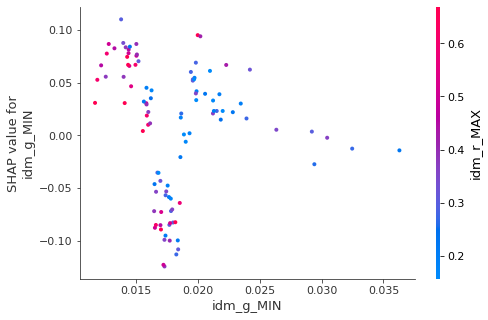

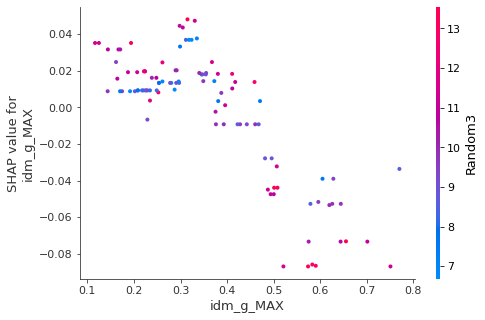

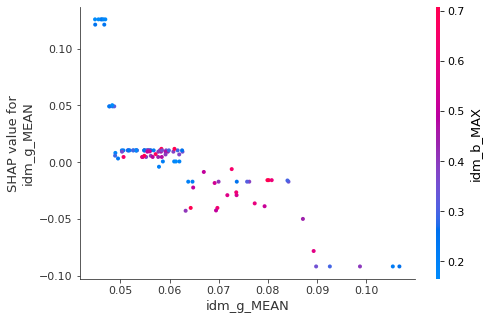

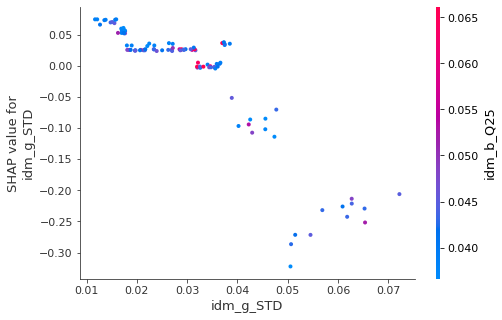

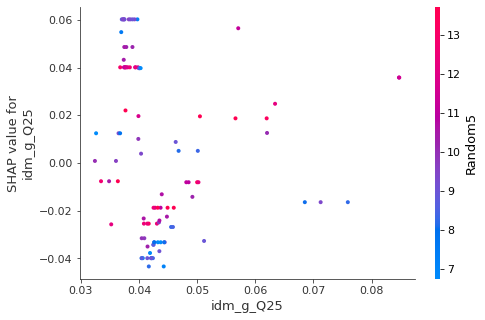

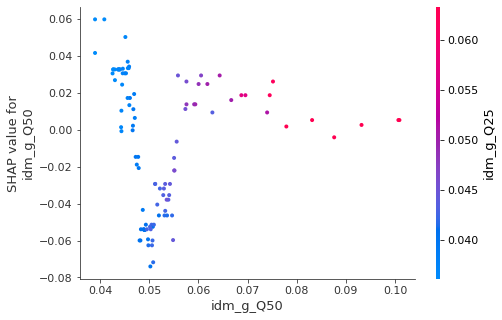

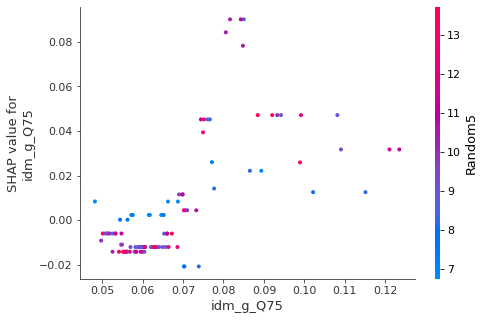

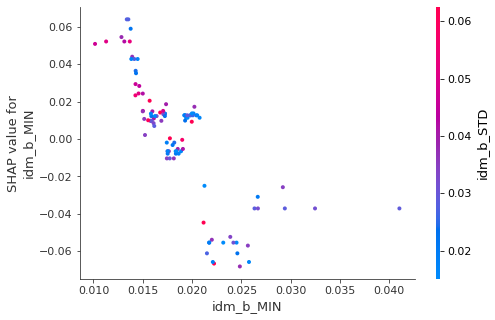

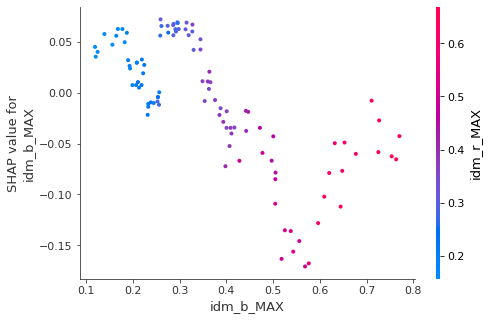

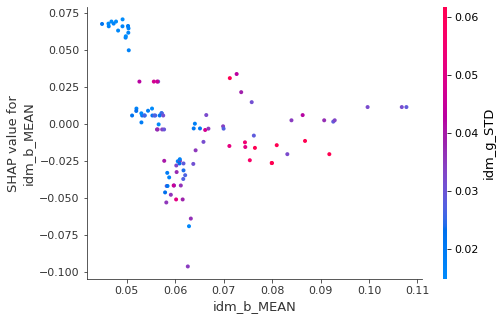

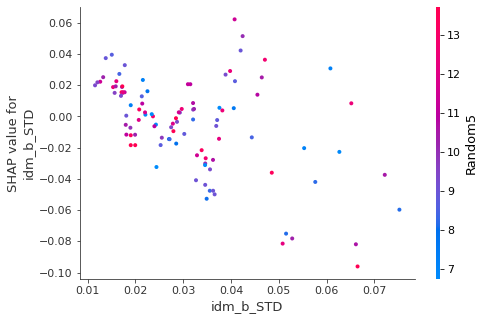

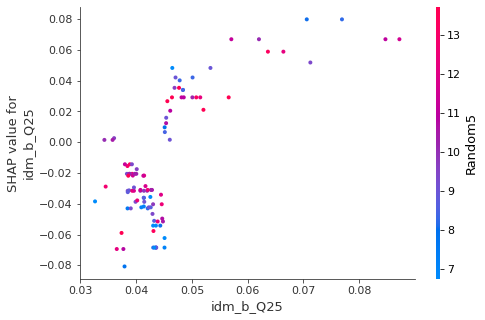

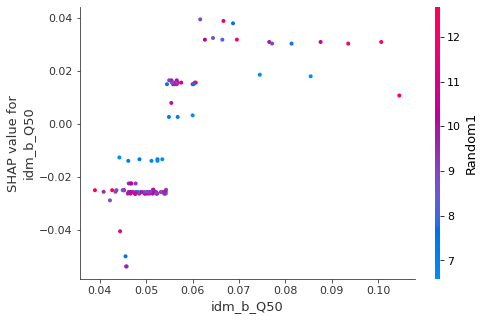

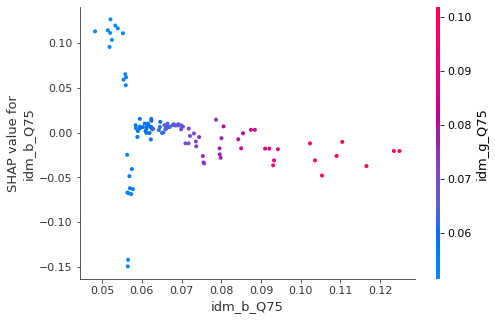

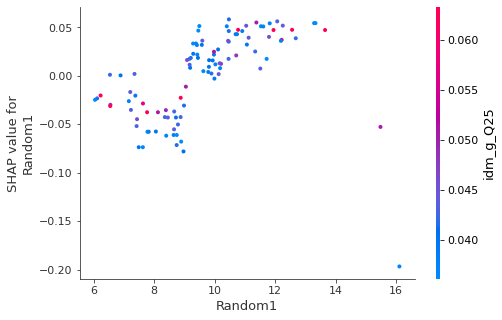

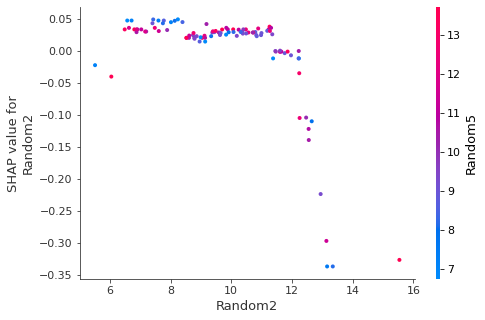

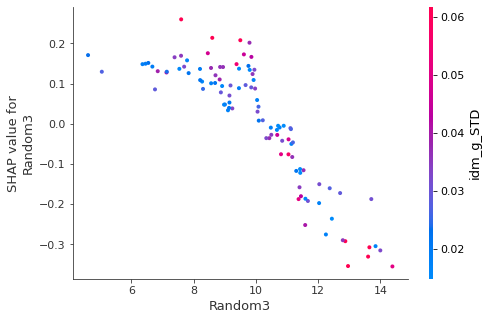

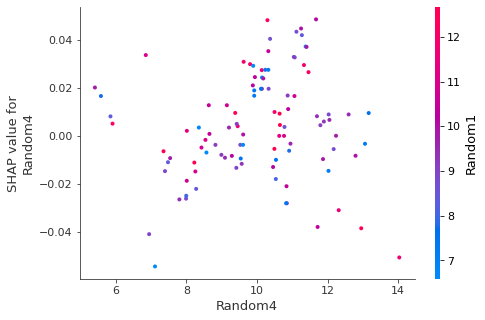

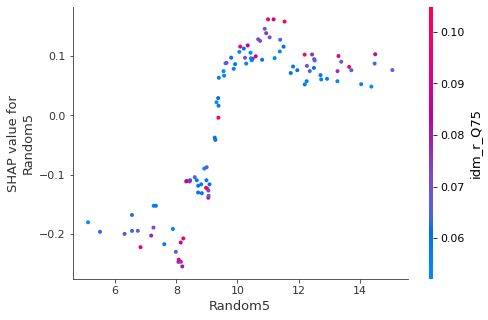

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [46]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.txt")